In [1]:

import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages')
# installing and importing required packages
!pip3 install numpy 
!pip3 install opencv-python
!pip3 install pandas
!pip3 install matplotlib
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [98]:
img = cv.imread('/Users/apple/Desktop/lion.jpg') # path to image 

img = cv.resize(img, (255,255)) # resizing image
img= cv.cvtColor(img, cv.COLOR_BGR2RGB)
# implementing various kernels to be used for filters
gaussianBlurKernel = np.array(([[1, 2, 1],
                                [2, 4, 2], 
                                [1, 2, 1]]), np.float32)/9

SharpenKernel = np.array(([[0, -1, 0], 
                           [-1, 9, -1], 
                           [0, -1, 0]]), np.float32)/9

meanBlurKernel = np.ones((3,3),np.float32)/9

gaussianBlur = cv.filter2D(src=img, kernel=gaussianBlurKernel, ddepth=-1)
MeanBlur = cv.filter2D(src=img,kernel=meanBlurKernel,ddepth = -1)
Sharpen = cv.filter2D(src=img,kernel=SharpenKernel,ddepth=-1)
''' cv.filter2D applied convolution on an image using specified kernels,parameters :
    src − object representing the source (input image) for this operation.
    ddepth − A variable of the type integer representing the depth of the output image.
    kernel − object representing the convolution kernel.'''
# comnining filters
stack = np.concatenate((img,gaussianBlur,MeanBlur,Sharpen),axis=1)
    

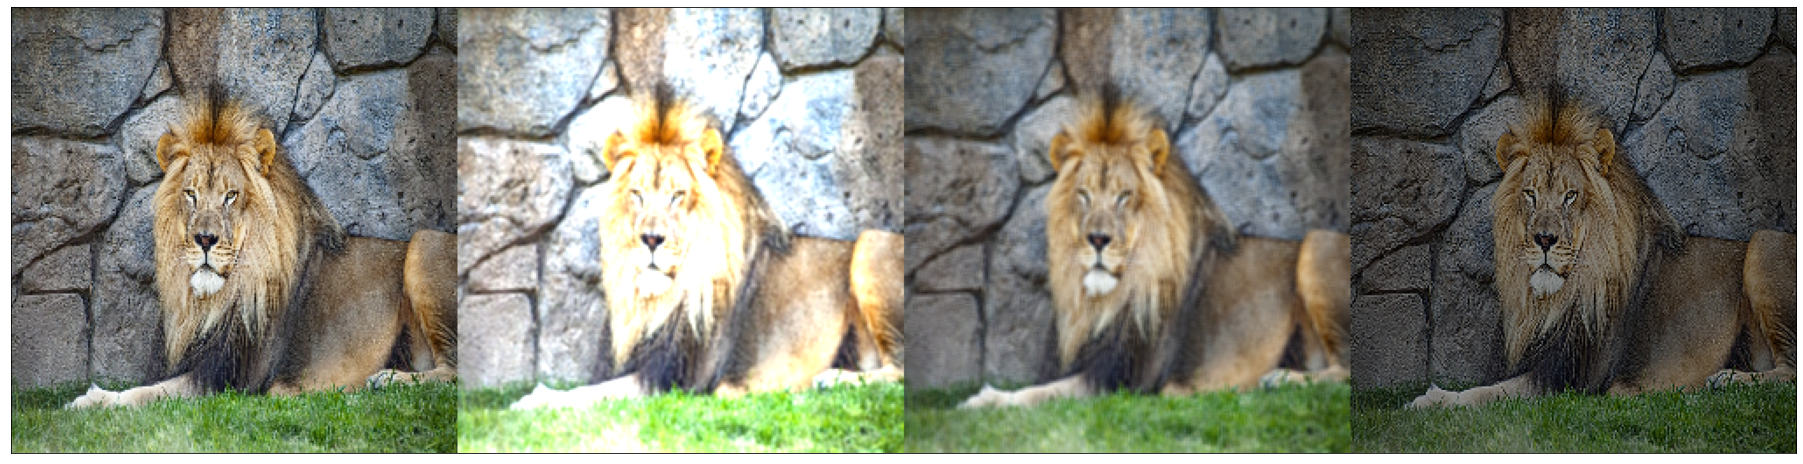

In [99]:
# making figure to plot images ,using matplotlib
fig,ax = plt.subplots(1,1, figsize=(32,64), subplot_kw={'xticks': [], 'yticks': []})

ax.imshow(stack)
    
plt.show()

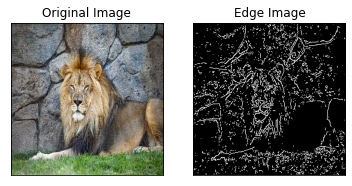

In [64]:
# using Canny Edge detector for detecting edges in openCV
edges = cv.Canny(img,290,300)

plt.subplot(121),plt.imshow(img ,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

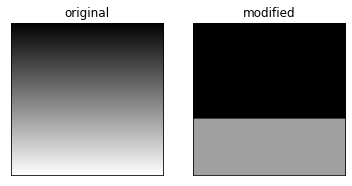

In [79]:
image = cv.imread("/Users/apple/Desktop/gradient.jpg")
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)

ret,thresh = cv.threshold(image, 160,160, cv.THRESH_BINARY)
plt.subplot(121),plt.imshow(image ,cmap = 'gray')
plt.title('original'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(thresh ,cmap = 'gray')
plt.title('modified'), plt.xticks([]), plt.yticks([])
plt.show()

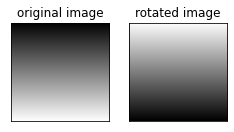

In [111]:
image2 = cv.imread('/Users/apple/Desktop/gradient.jpg') 

rows,cols = image.shape[:2] 
#(col/2,rows/2) is the center of rotation for the image , 180 is the rotated angle
# M is the cordinates of the center , 
M = cv.getRotationMatrix2D((cols/2,rows/2),180,1) 
dist = cv.warpAffine(image,M,(cols,rows))

plt.subplot(131),plt.imshow(image2 ,cmap = 'gray')
plt.title('original image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dist ,cmap = 'gray')
plt.title('rotated image'), plt.xticks([]), plt.yticks([])
plt.show()

## Face bounding box


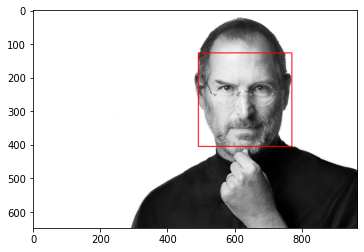

In [151]:

#load the classifiers downloaded 
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')
#read the image and convert to grayscale format
img3 = cv.imread('/Users/apple/Desktop/face.jpeg')

#calculate coordinates 
faces = face_cascade.detectMultiScale(img3,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv.CASCADE_SCALE_IMAGE)
for (x,y,w,h) in faces:
    
    cv.rectangle(img3,(x,y),(x+w,y+h),(255,0,0),2)
    
    

#plot the image

plt.imshow(img3)


